In [1]:
import matplotlib.pyplot as plt

In [22]:
datagenerator=tf.keras.preprocessing.image.ImageDataGenerator(
                                                              rescale=1./255,
                                                   validation_split=0.2)

train_generator = datagenerator.flow_from_directory(directory='Dataset',
                                               subset='training' ,
                                              batch_size=32,
                                              target_size=(128,128),
                                              color_mode='rgb',
                                              shuffle=True)

validation_generator  = datagenerator.flow_from_directory(directory='Dataset',
                                              subset='validation' ,
                                              batch_size=32,
                                              target_size=(128,128),
                                              color_mode='rgb',
                                                    shuffle=True)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [4]:
print(train_generator.class_indices)

{'Cloudy': 0, 'Rain': 1, 'Shine': 2, 'Sunnrise': 3}


# CNN Model

In [23]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [36]:
model=Sequential()
model.add( tf.keras.layers.Conv2D(16,(3,3),input_shape = ( 128,128,3 ), activation= 'relu')) 
model.add(Conv2D(16,(3,3), activation= 'relu'))


model.add( MaxPooling2D(pool_size = (2,2) ))
model.add(Dropout(rate=0.25))
model.add(Conv2D(32,(3,3), activation= 'relu' )) 
 

model.add( MaxPooling2D(pool_size = (2,2) ))
model.add(Dropout(rate=0.4))

model.add( Flatten() )

model.add( Dense(units=64,activation= 'relu') )
model.add( Dense(units=32,activation= 'relu') )
model.add(Dropout(rate=0.5))
model.add( Dense( 4 ) )
model.add( Activation( 'softmax' ) )
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 conv2d_36 (Conv2D)          (None, 124, 124, 16)      2320      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 62, 62, 16)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                

In [37]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )

In [38]:
epochs=10                       
history=model.fit( train_generator,  batch_size=32,
    validation_data = validation_generator, 
    epochs =epochs )

Epoch 1/10
29/29 [==============================] - 33s 1s/step - loss: 1.1679 - accuracy: 0.4584 - val_loss: 0.9070 - val_accuracy: 0.5982
Epoch 2/10
29/29 [==============================] - 32s 1s/step - loss: 0.8344 - accuracy: 0.6149 - val_loss: 0.7010 - val_accuracy: 0.6964
Epoch 3/10
29/29 [==============================] - 30s 1s/step - loss: 0.7868 - accuracy: 0.6471 - val_loss: 0.7011 - val_accuracy: 0.8036
Epoch 4/10
29/29 [==============================] - 28s 949ms/step - loss: 0.6672 - accuracy: 0.6715 - val_loss: 0.5883 - val_accuracy: 0.7679
Epoch 5/10
29/29 [==============================] - 27s 921ms/step - loss: 0.6256 - accuracy: 0.7248 - val_loss: 0.5839 - val_accuracy: 0.7857
Epoch 6/10
29/29 [==============================] - 27s 929ms/step - loss: 0.5962 - accuracy: 0.7825 - val_loss: 0.5315 - val_accuracy: 0.8214
Epoch 7/10
29/29 [==============================] - 27s 912ms/step - loss: 0.5123 - accuracy: 0.8335 - val_loss: 0.4947 - val_accuracy: 0.8170
Epoch 8/

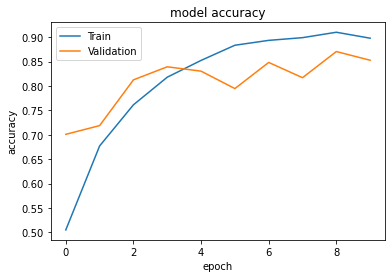

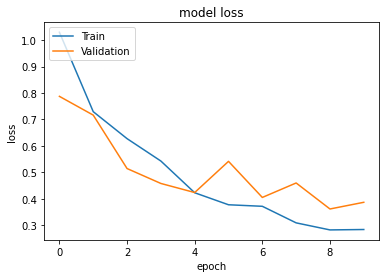

In [9]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Model Evaluation

In [41]:
loss,acc=model.evaluate( validation_generator)
print("Validation Loss =",loss)
print("Validation Accuracy =",acc)

7/7 [==============================] - 4s 550ms/step - loss: 0.3310 - accuracy: 0.8705
Validation Loss = 0.33103635907173157
Validation Accuracy = 0.8705357313156128
